# Der Machine-Learning-Prozess #

## Feature Kodierung

In [2]:
# scikit-learn und pandas für Label Encoding
from sklearn import preprocessing
import pandas as pd

pupil_list = {'schueler' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'Note' : ["sehr gut", "gut", "gut", "befriedigend", "genügend",
                       "nicht genügend", "sehr gut", "genügend", "gut", "gut"],
             'Haarfarbe' : ["Braun", "Schwarz", "Blond", "Blau", "Schwarz", "Brünett",
                           "Rot", "Braun", "Schwarz", "Schwarz"]}
df = pd.DataFrame(pupil_list, columns = ['schueler', 'Note', 'Haarfarbe'])
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(df['Haarfarbe'])
lab_enc.transform(df['Haarfarbe'])

array([2, 5, 1, 0, 5, 3, 4, 2, 5, 5])

In [3]:
one_enc = preprocessing.OneHotEncoder(sparse = False)
help_enc = preprocessing.LabelEncoder()
# Umwandlung Haarfarbe -> Ganzzahl
help_col = help_enc.fit_transform(df['Haarfarbe'])
one_enc.fit_transform(help_col.reshape(len(df['Haarfarbe']), -1))

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [5]:
import category_encoders as ce
import pandas as pd
from sklearn.datasets import load_boston

# Vorbereitung der Daten
# Hauspreise im Gebiet Boston
bucket = load_boston()
# print(bucket.DESCR) für ausführliche Beschreibung

y = bucket.target
X = pd.DataFrame(bucket.data, columns = bucket.feature_names)

X.head(3)

C:\Users\linus_05m2yty\anaconda3\envs\Env_tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [6]:
# Verwendung von binary encoding für zwei kategorische Features
encoded = ce.BinaryEncoder(cols = ['CHAS', 'RAD']).fit(X, y)

# Transformation
x_trans = encoded.transform(X)

x_trans.head(3)

C:\Users\linus_05m2yty\anaconda3\envs\Env_tensorflow\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):


,CRIM,ZN,INDUS,CHAS_0,CHAS_1,NOX,RM,AGE,DIS,RAD_0,RAD_1,RAD_2,RAD_3,RAD_4,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,1,0.538,6.575,65.2,4.0900,0,0,0,0,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,1,0.469,6.421,78.9,4.9671,0,0,0,1,0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,1,0.469,7.185,61.1,4.9671,0,0,0,1,0,242.0,17.8,392.83,4.03


## Numerische Features

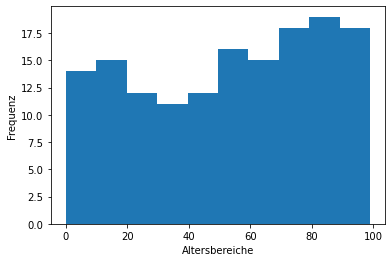

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 150 zufällige Alterswerte 0-99
k_counter = np.random.randint(0, 100, 150)

# Zuordnung zu Bins im 10er-Abstand: 0-9, 10-19, ...
np.floor_divide(k_counter, 10)

# Ausgabe
plt.hist(k_counter, bins=10)
plt.ylabel('Frequenz')
plt.xlabel('Altersbereiche')
plt.show()

In [8]:
# erste 10 Werte
print(k_counter[:10])

[87 74 27  0 49 23  1 72 80 42]


In [9]:
import pandas as pd
# beliebige Zahlen
rand_elems = np.random.randint(0, 10000, 100)

# pandas qcut für Perzentil-Grenzen
perc_limits = pd.qcut(rand_elems, 10)
perc_limits

[(3803.4, 4815.8], (3803.4, 4815.8], (3803.4, 4815.8], (4815.8, 5606.5], (79.999, 1425.9], ..., (2576.4, 3803.4], (2576.4, 3803.4], (4815.8, 5606.5], (7439.3, 8377.4], (5606.5, 6550.2]]
Length: 100
Categories (10, interval[float64, right]): [(79.999, 1425.9] < (1425.9, 2576.4] < (2576.4, 3803.4] < (3803.4, 4815.8] ... (6550.2, 7439.3] < (7439.3, 8377.4] < (8377.4, 9042.5] < (9042.5, 9879.0]]

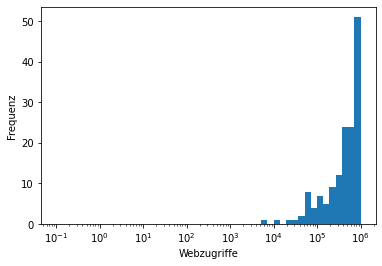

In [10]:
import numpy as np

# 150 Zahlen mit großen Unterschieden, Simulation von Webzugriffen
webaccess = np.random.randint(0, 1000000, 150)

# Ausgabe logarithmisches Binning mit 10er-Logarithmus
plt.hist(webaccess, bins = np.logspace(np.log10(0.1), np.log10(1000000), 50))
plt.gca().set_xscale("log")
plt.ylabel('Frequenz')
plt.xlabel('Webzugriffe')
plt.show()

In [13]:
from sklearn.preprocessing import scale, minmax_scale
import numpy as np
rand_elems = np.random.randint(0, 10000, 100).astype(np.float64)

x_minmax_sc = minmax_scale(rand_elems)
x_var_sc = scale(rand_elems, with_mean = True, with_std = True)
x_var_sc

array([ 1.62855521e+00, -2.09854769e-01, -1.52960907e+00, -3.29648371e-01,
       -2.39216012e-02,  1.60628372e+00,  1.51955990e+00, -1.00994105e+00,
        1.10585017e+00, -4.31560668e-02,  1.34138801e+00,  1.31945397e+00,
       -8.95209150e-01, -1.27517758e-01, -1.15133124e+00, -7.13662790e-01,
       -9.13768722e-01, -9.75521480e-01,  1.60695862e+00, -7.22773853e-01,
       -2.32467077e-02,  3.51656649e-01, -1.38416951e+00,  1.00056678e+00,
        6.12165552e-01,  1.55701650e+00,  1.48851480e+00,  3.03401761e-01,
       -1.02715084e+00, -1.25121549e+00, -9.61352090e-02,  5.33203009e-01,
        1.31844163e+00, -9.94755946e-01,  7.75152340e-01, -7.43020659e-01,
        3.74603029e-01,  1.15714208e+00,  7.89996623e-02,  1.30528121e+00,
       -4.04898999e-01, -1.48540354e+00, -2.26727107e-01, -5.68898128e-01,
        1.66331223e+00,  1.50268757e+00, -1.14087040e+00,  1.58299990e+00,
        1.04645954e+00,  4.56940040e-01, -9.66072971e-01, -1.63219289e+00,
        1.59177351e+00, -

## Räumliche Features

In [16]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent = "Meine Anwendung")

lokation = geolocator.geocode("Rheinwerkallee 4, 52227 Bonn")
print("Adresse:", lokation.address)
print("LatLon:", lokation.latitude, lokation.longitude)

Adresse: Rheinwerk Verlag, 4, Rheinwerkallee, Ramersdorf, Bonn-Beuel, Bonn, Nordrhein-Westfalen, 53227, Deutschland
LatLon: 50.7172803 7.1538127


## Natural Language Processing

In [17]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [18]:
from nltk.tokenize import word_tokenize
myText = """Albert hat heute zwar gefrühstückt, allerdings hat er schon
    wieder einen Riesenhunger. Möglicherweise ist schon wieder Mittag!"""
tokens = word_tokenize(myText, 'german')
print(tokens)

['Albert', 'hat', 'heute', 'zwar', 'gefrühstückt', ',', 'allerdings', 'hat', 'er', 'schon', 'wieder', 'einen', 'Riesenhunger', '.', 'Möglicherweise', 'ist', 'schon', 'wieder', 'Mittag', '!']


In [19]:
tokens = [w.lower() for w in tokens]
word_list = [w for w in tokens if w.isalpha()]
print(word_list)

['albert', 'hat', 'heute', 'zwar', 'gefrühstückt', 'allerdings', 'hat', 'er', 'schon', 'wieder', 'einen', 'riesenhunger', 'möglicherweise', 'ist', 'schon', 'wieder', 'mittag']


In [20]:
from random import shuffle
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
shuffle(stop_words)
print(stop_words[:20])

['einigen', 'ist', 'war', 'ihren', 'doch', 'warst', 'alles', 'bei', 'es', 'keinen', 'unseres', 'dein', 'desselben', 'einer', 'nur', 'dessen', 'noch', 'derer', 'unserem', 'derselbe']


In [21]:
from nltk.stem.snowball import SnowballStemmer
snow = SnowballStemmer("german")
stemmed = [snow.stem(w) for w in word_list]
print(stemmed)

['albert', 'hat', 'heut', 'zwar', 'gefruhstuckt', 'allerding', 'hat', 'er', 'schon', 'wied', 'ein', 'riesenh', 'moglicherweis', 'ist', 'schon', 'wied', 'mittag']


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

myText = ["""Albert hat heute zwar gefrühstückt, allerdings hat er schon
    wieder einen Riesenhunger. Möglicherweise ist schon wieder Mittag!"""]

count_vector = CountVectorizer()
bow = count_vector.fit_transform(myText)
print(count_vector.vocabulary_)

{'albert': 0, 'hat': 5, 'heute': 6, 'zwar': 13, 'gefrühstückt': 4, 'allerdings': 1, 'er': 3, 'schon': 11, 'wieder': 12, 'einen': 2, 'riesenhunger': 10, 'möglicherweise': 9, 'ist': 7, 'mittag': 8}


## Datenaugmentation für Bilder

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagenerator = ImageDataGenerator(
    rotation_range = 0.3,
    horizontal_flip = True,
    width_shift_range = 0.3,
    height_shift_range = 0.2,
    fill_mode = 'nearest')

Verwendung in Kapitel 13

## Feature Transformation

In [28]:
from sklearn.datasets import load_iris
iris_daten = load_iris()
iris_X, iris_y = iris_daten.data, iris_daten.target

In [29]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
iris_pca = PCA(n_components = 2)

iris_pca.fit(iris_X)
iris_X_pca = iris_pca.transform(iris_X)

iris_pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

Text(0, 0.5, 'Sepal-Breite [cm]')

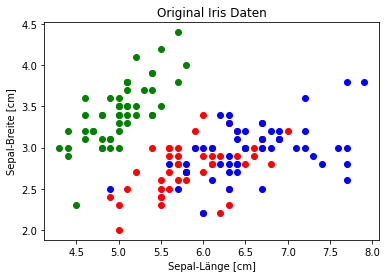

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

for lab, mark, col in zip(range(3), ('^', 's', 'o'), ('green', 'red', 'blue')):
    plt.scatter(x = iris_X[:,0].real[iris_y == lab],
               y = iris_X[:,1].real[iris_y == lab],
               color = col)

plt.title("Original Iris Daten")
plt.xlabel("Sepal-Länge [cm]")
plt.ylabel("Sepal-Breite [cm]")

Text(0, 0.5, 'Sepal-Breite [cm]')

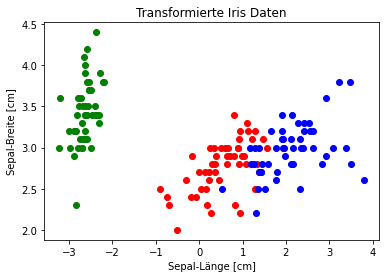

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

for lab, mark, col in zip(range(3), ('^', 's', 'o'), ('green', 'red', 'blue')):
    plt.scatter(x = iris_X_pca[:,0].real[iris_y == lab],
               y = iris_X[:,1].real[iris_y == lab],
               color = col)

plt.title("Transformierte Iris Daten")
plt.xlabel("Sepal-Länge [cm]")
plt.ylabel("Sepal-Breite [cm]")

## Feature Auswahl

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = iris_X
y = iris_y

test = SelectKBest(score_func = chi2, k = 4)
myFilter = test.fit(X, y)
X_trans = myFilter.transform(X)

In [35]:
X_trans

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

myModel = LogisticRegression()
rfe = RFE(myModel, n_features_to_select = 3)
rfe = rfe.fit(X,y)

C:\Users\linus_05m2yty\anaconda3\envs\Env_tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
